In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sales=pd.DataFrame({
    'CustomerID':[1,2,3,4],
    'OrderID':[101,102,103,104],
    'Product':['widet','gizmo','gadget','toy'],
    'Quantity':[2,1,3,None]
})

In [11]:
Customers = pd.DataFrame({
    'CustomerID':[1,2,3,4],
    'Region':['North','South','East','West']
})

In [13]:
Products = pd.DataFrame({
    'Product':['widet','gizmo','gadget','toy'],
    'Price':[100,50,60,80]
})

In [15]:
sales['Quantity'].fillna(0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_6880\2040127113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['Quantity'].fillna(0,inplace=True)


In [19]:
sales.head()

CustomerID  OrderID Product  Quantity
0           1      101   widet       2.0
1           2      102   gizmo       1.0
2           3      103  gadget       3.0
3           4      104     toy       0.0

In [21]:
sales=sales.merge(Customers,on='CustomerID').merge(Products,on='Product')

In [23]:
sales.head()

CustomerID  OrderID Product  Quantity Region  Price
0           1      101   widet       2.0  North    100
1           2      102   gizmo       1.0  South     50
2           3      103  gadget       3.0   East     60
3           4      104     toy       0.0   West     80

In [35]:
sales["TotalRevenue"] = sales["Quantity"] * sales["Price"]

In [37]:
pivot_table = pd.pivot_table(sales,values='TotalRevenue',index='Region',columns='Product',aggfunc='sum',fill_value=0)

In [39]:
pivot_table.head()

Product  gadget  gizmo  toy  widet
Region                            
East      180.0    0.0  0.0    0.0
North       0.0    0.0  0.0  200.0
South       0.0   50.0  0.0    0.0
West        0.0    0.0  0.0    0.0

C:\Users\dell\AppData\Local\Temp\ipykernel_6880\4279413366.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales,x='Product',y='TotalRevenue',estimator=sum,ci=None)


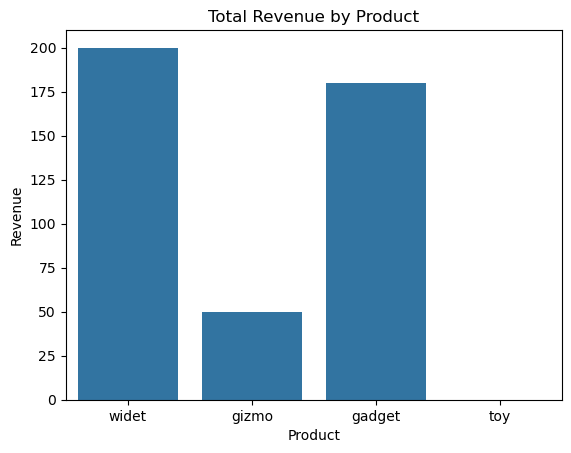

In [41]:
sns.barplot(data=sales,x='Product',y='TotalRevenue',estimator=sum,ci=None)
plt.title('Total Revenue by Product')
plt.ylabel('Revenue')
plt.show()

In [51]:
with pd.ExcelWriter('analysis_results.xlsx') as writer:
    sales.to_excel(writer,sheet_name='salesdata'),
    pivot_table.to_excel(writer,sheet_name='pivottable')